<a href="https://colab.research.google.com/github/sameeraiz/ML--Book-Recommendation-system/blob/main/Mohammad_Faiz_Unsupervised_Machine_Learning_Book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Book Recommendation System**



##### **Project Type**    - Unsupervised Machine Learning .
##### **Contribution**    - Team
##### **Team Member 1 -** Mohammad Faiz
##### **Team Member 2 -** Toyaj Kumar yadav

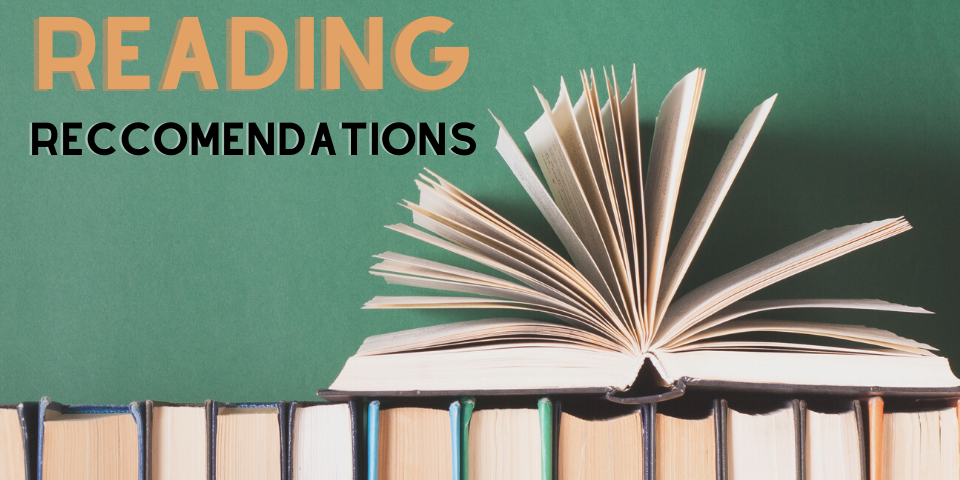

# **Project Summary -** 


- Recommender systems are algorithms aimed at suggesting relevant items to users (movies,
books, products). Recommender systems are really critical in some industries as they can
generate a huge amount of income when they are efficient or can also be a way to stand out
significantly from competitors.
- In this project, we create a book recommendation system for users through Unsupervised
Machine Learning using three datasets - Books.csv, Users.csv, Ratings.csv

# **GitHub Link -**

https://github.com/sameeraiz/ML-Book-Recommendation-system.git

# **Problem Statement**


In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really effective in some industries as they can help in vast amount of profit when they are efficient or also be a way to stand out significantly from the rest of the market's competitors. The main objective is to create a book recommendation system for users.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

# Visualisization libraries.
import missingno as msno

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

### Dataset Loading

In [ ]:
# Load Dataset
# Books = https://drive.google.com/file/d/1SJ4Z3FZRMBGtWWf5Dyytniq2EEM2rEhZ/view?usp=share_link 
# Ratings = https://drive.google.com/file/d/1ft7FzGDHPLWEKi9vv7i5SpxMgnvxYU_E/view?usp=sharing
# Users = https://drive.google.com/file/d/1ouMk1IYru9PkjgKvO-3kC9HVB1SBTlzS/view?usp=sharing

books_df = pd.read_csv('https://drive.google.com/uc?id=1SJ4Z3FZRMBGtWWf5Dyytniq2EEM2rEhZ')
ratings_df = pd.read_csv('https://drive.google.com/uc?id=1ft7FzGDHPLWEKi9vv7i5SpxMgnvxYU_E')
users_df = pd.read_csv('https://drive.google.com/uc?id=1ouMk1IYru9PkjgKvO-3kC9HVB1SBTlzS')

<ipython-input-3-32a64a8fa0b5>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('https://drive.google.com/uc?id=1SJ4Z3FZRMBGtWWf5Dyytniq2EEM2rEhZ')


### Dataset First View

In [ ]:
# Dataset First Look
books_df.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
156855,0782119697,MCSE : TCP/IP Study Guide,Todd Lammle,1997,Sybex Inc,http://images.amazon.com/images/P/0782119697.0...,http://images.amazon.com/images/P/0782119697.0...,http://images.amazon.com/images/P/0782119697.0...
21579,0156007533,The Riddle of the Compass: The Invention that ...,Amir D. Aczel,2002,Harvest Books,http://images.amazon.com/images/P/0156007533.0...,http://images.amazon.com/images/P/0156007533.0...,http://images.amazon.com/images/P/0156007533.0...
116685,0590026232,Ghostmasters: Wierd Stories by Famous Writers,Betty M. Owen,1977,Scholastic,http://images.amazon.com/images/P/0590026232.0...,http://images.amazon.com/images/P/0590026232.0...,http://images.amazon.com/images/P/0590026232.0...
262170,0966675304,This Old House Essential Hand Tools: 26 Tools ...,Norm Abram,2000,This Old House Books,http://images.amazon.com/images/P/0966675304.0...,http://images.amazon.com/images/P/0966675304.0...,http://images.amazon.com/images/P/0966675304.0...
232690,0441711561,"The Ring of Ikribu (Red Sonja, #1)",David C. Smith,1981,Penguin Putnam~mass,http://images.amazon.com/images/P/0441711561.0...,http://images.amazon.com/images/P/0441711561.0...,http://images.amazon.com/images/P/0441711561.0...


In [ ]:
# Dataset First Look
ratings_df.sample(5)

,User-ID,ISBN,Book-Rating
208392,48213,0517548232,0
62384,12569,0002256622,0
504561,122782,0671015206,0
683407,166450,0582527872,0
187230,41084,0399135421,0


In [ ]:
# Dataset First Look
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Total number of rows & columns in book dataset {books_df.shape}")
print(f"Total number of rows & columns in ratings dataset {ratings_df.shape}")
print(f"Total number of rows & columns in users dataset {users_df.shape}")

Total number of rows & columns in book dataset (271360, 8)
Total number of rows & columns in ratings dataset (1149780, 3)
Total number of rows & columns in users dataset (278858, 3)


## **Dataset Information**

### Books

In [ ]:
# Dataset Info
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


#### We get to know these insights from our dataset.

- Total entries are 2,71,360 and there are 8-columns.
- All attributes have object data types.
- There are somme null values in few columns/attributes.

### Ratings

In [ ]:
# Dataset Info
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### We get to know these insights from our dataset.

- There are total of 11,49,780 entries and 3-columns only.
- User-ID & Book-rating are of Int64 data type remaining one (ISBN) is of object type.


### Users

In [ ]:
# Dataset Info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### We get to know these insights from our dataset.

- There are total of 2,78,858 entries and 3-columns only.
- User-id is of int64 data type, meanwhile location & age are object and float64 data type. 
- There are null values as well in the dataset.

### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Total Duplicate values in books are {books_df.duplicated().sum()}")
print(f"Total Duplicate values in ratings are {ratings_df.duplicated().sum()}")
print(f"Total Duplicate values in users are {users_df.duplicated().sum()}")

Total Duplicate values in books are 0
Total Duplicate values in ratings are 0
Total Duplicate values in users are 0


### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(f"Total Missing/null values in books are {books_df.isnull().mean()}")
print("======================================================================================")
print(f"Total Missing/null values in ratings are {ratings_df.isnull().mean()}")
print("======================================================================================")
print(f"Total Missing/null values in users are {users_df.isnull().mean()}")

Total Missing/null values in books are ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000004
Year-Of-Publication    0.000000
Publisher              0.000007
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.000011
dtype: float64
Total Missing/null values in ratings are User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64
Total Missing/null values in users are User-ID     0.000000
Location    0.000000
Age         0.397199
dtype: float64


- **From the above we can say that :**
- **Books dataset has almost negligible missing value in their dataset.**
- **Ratings dataset has 0% data missing in their columns.**
- **Users dataset has almost 40% data missing in age column.** 



In [ ]:
# Missing Values/Null Values Count
print(f"Total Missing/null values in books are {books_df.isnull().sum()}")
print("======================================================================================")
print(f"Total Missing/null values in ratings are {ratings_df.isnull().sum()}")
print("======================================================================================")
print(f"Total Missing/null values in users are {users_df.isnull().sum()}")

Total Missing/null values in books are ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Total Missing/null values in ratings are User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Total Missing/null values in users are User-ID          0
Location         0
Age         110762
dtype: int64


Axes(0.125,0.11;0.698618x0.77)


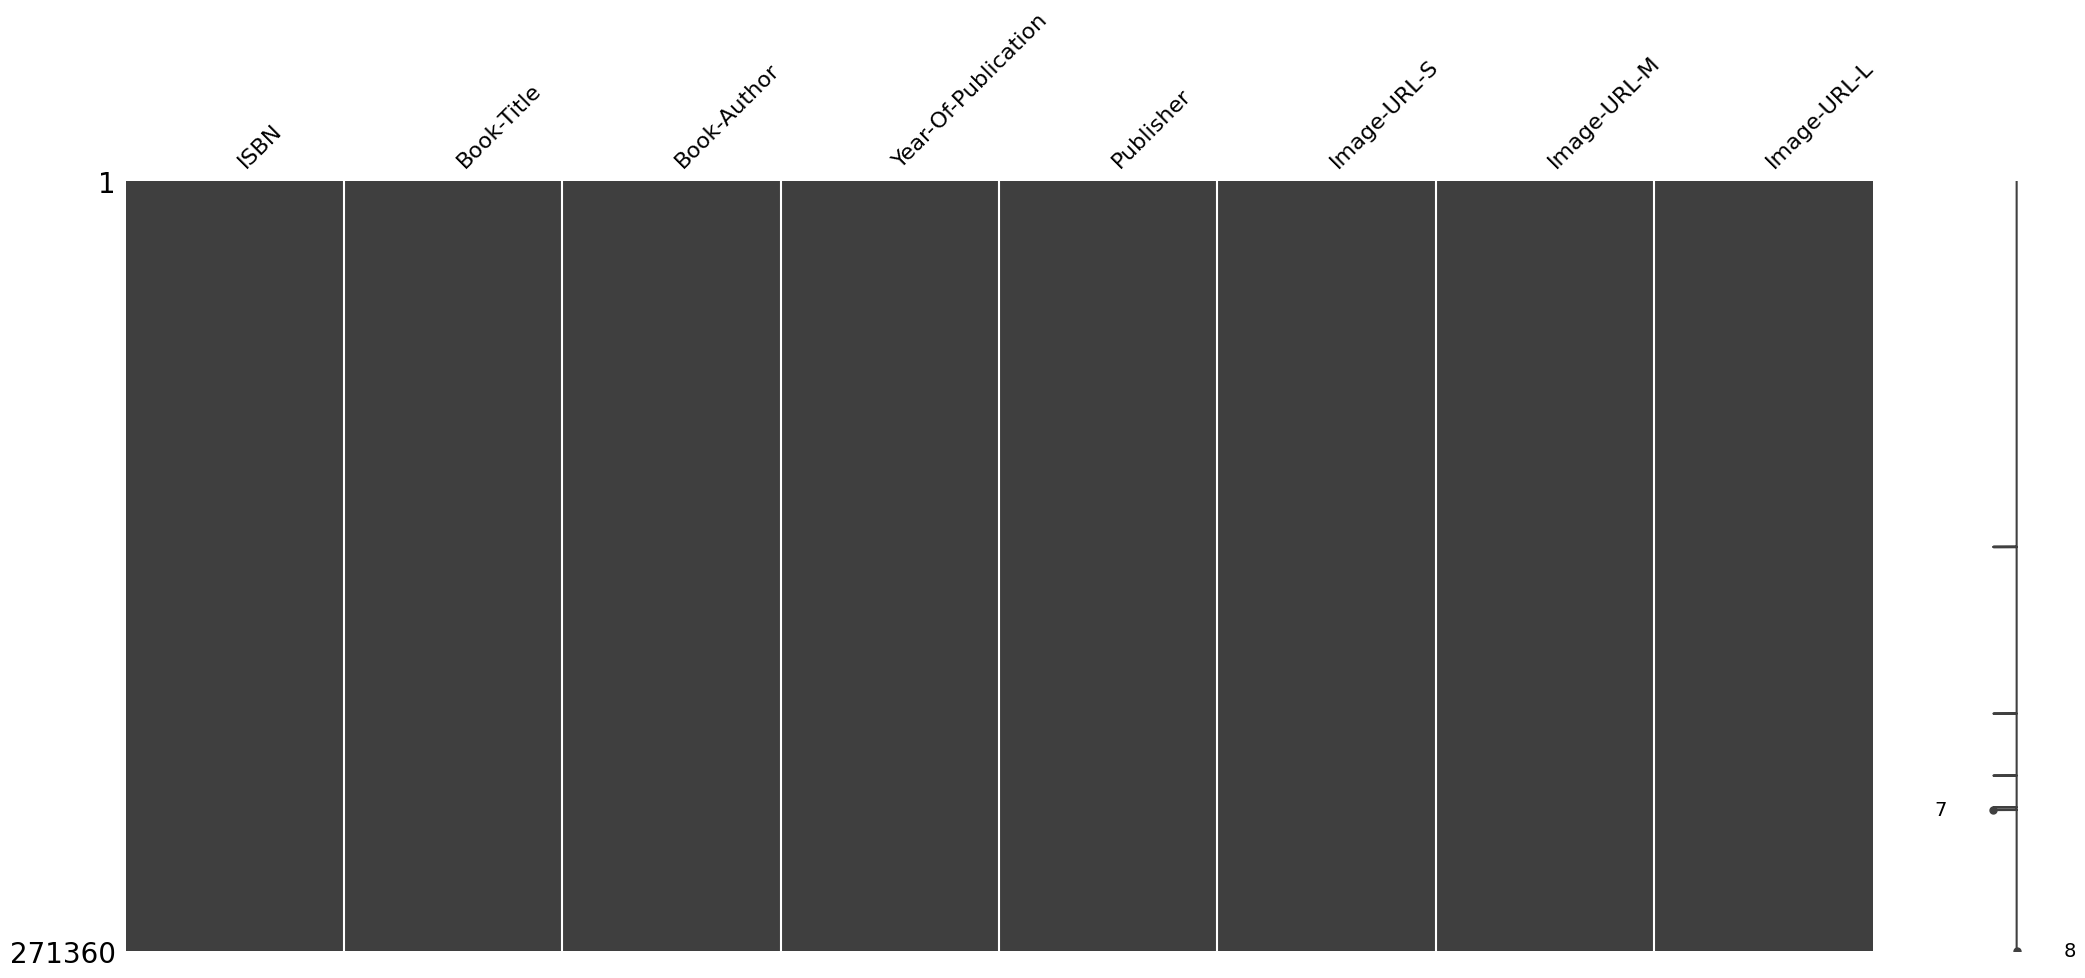

In [ ]:
# Visualizing the missing values
%matplotlib inline
print(msno.matrix(books_df))

Axes(0.125,0.11;0.698618x0.77)


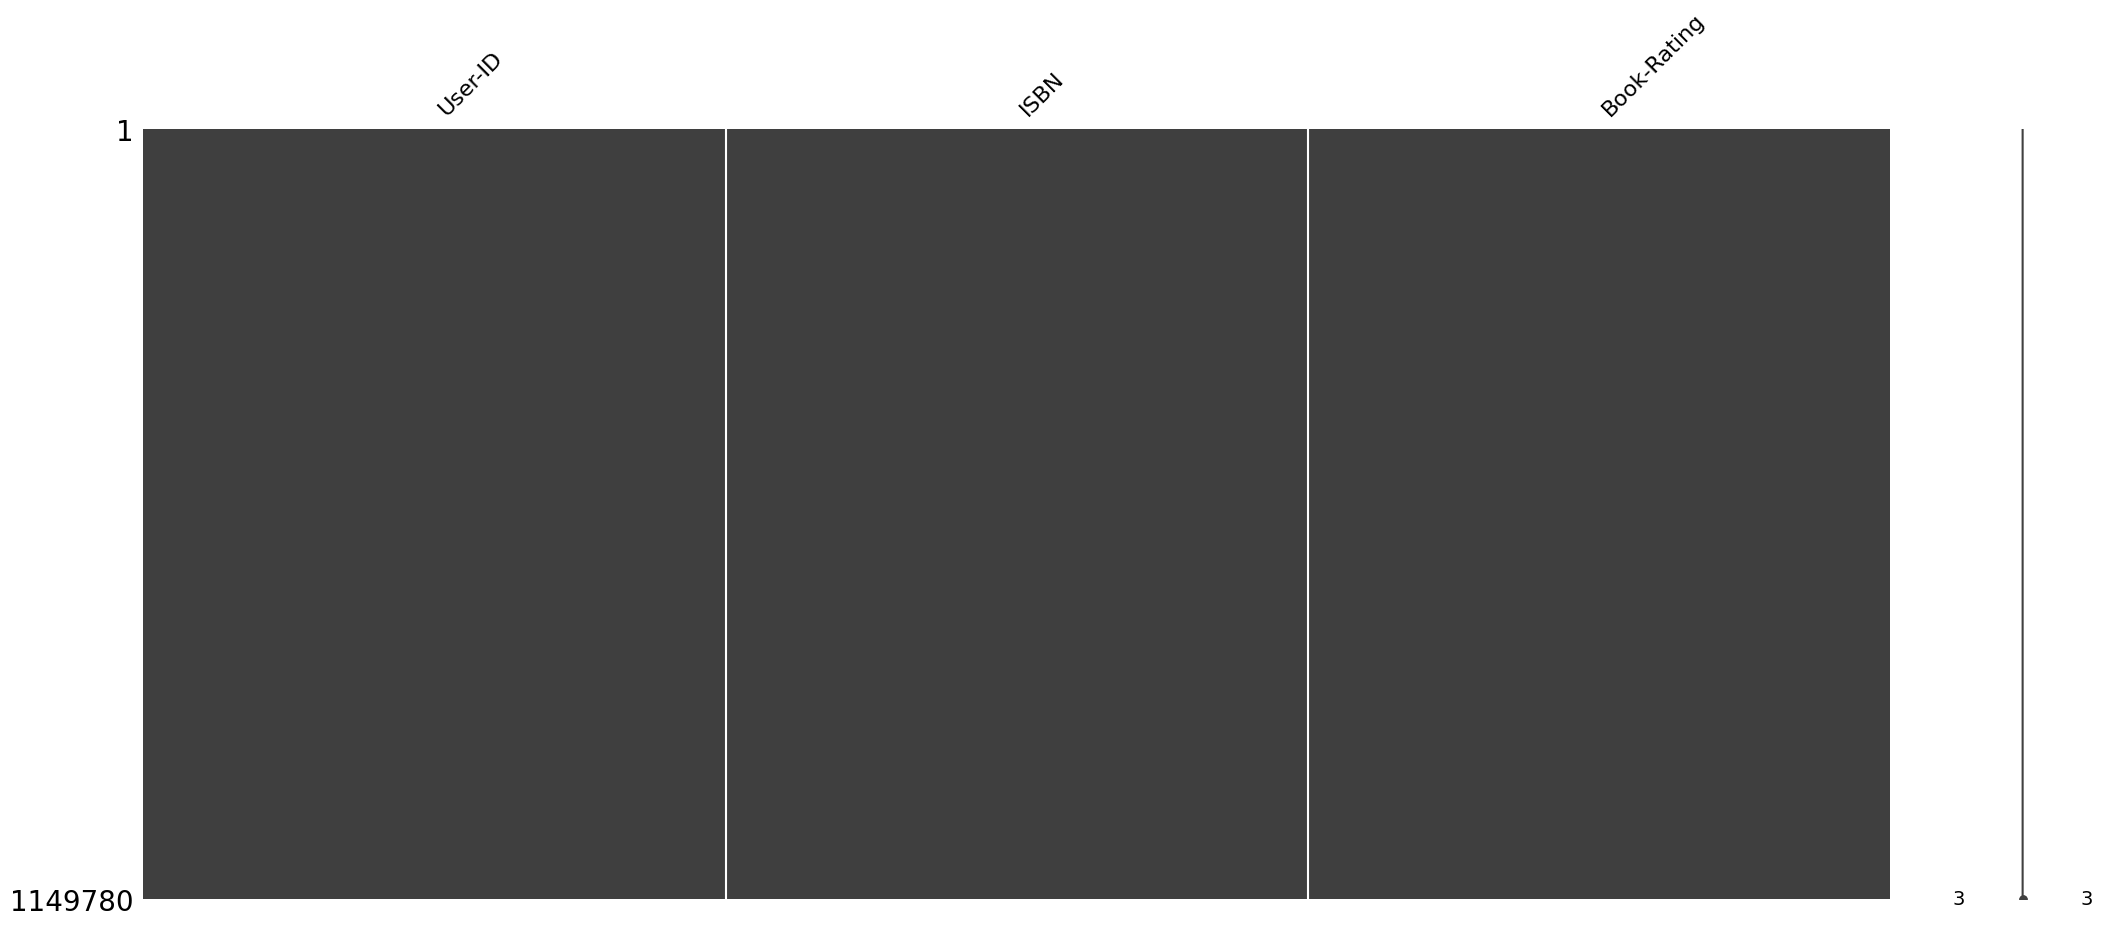

In [ ]:
# Visualizing the missing values
%matplotlib inline
print(msno.matrix(ratings_df))

Axes(0.125,0.11;0.698618x0.77)


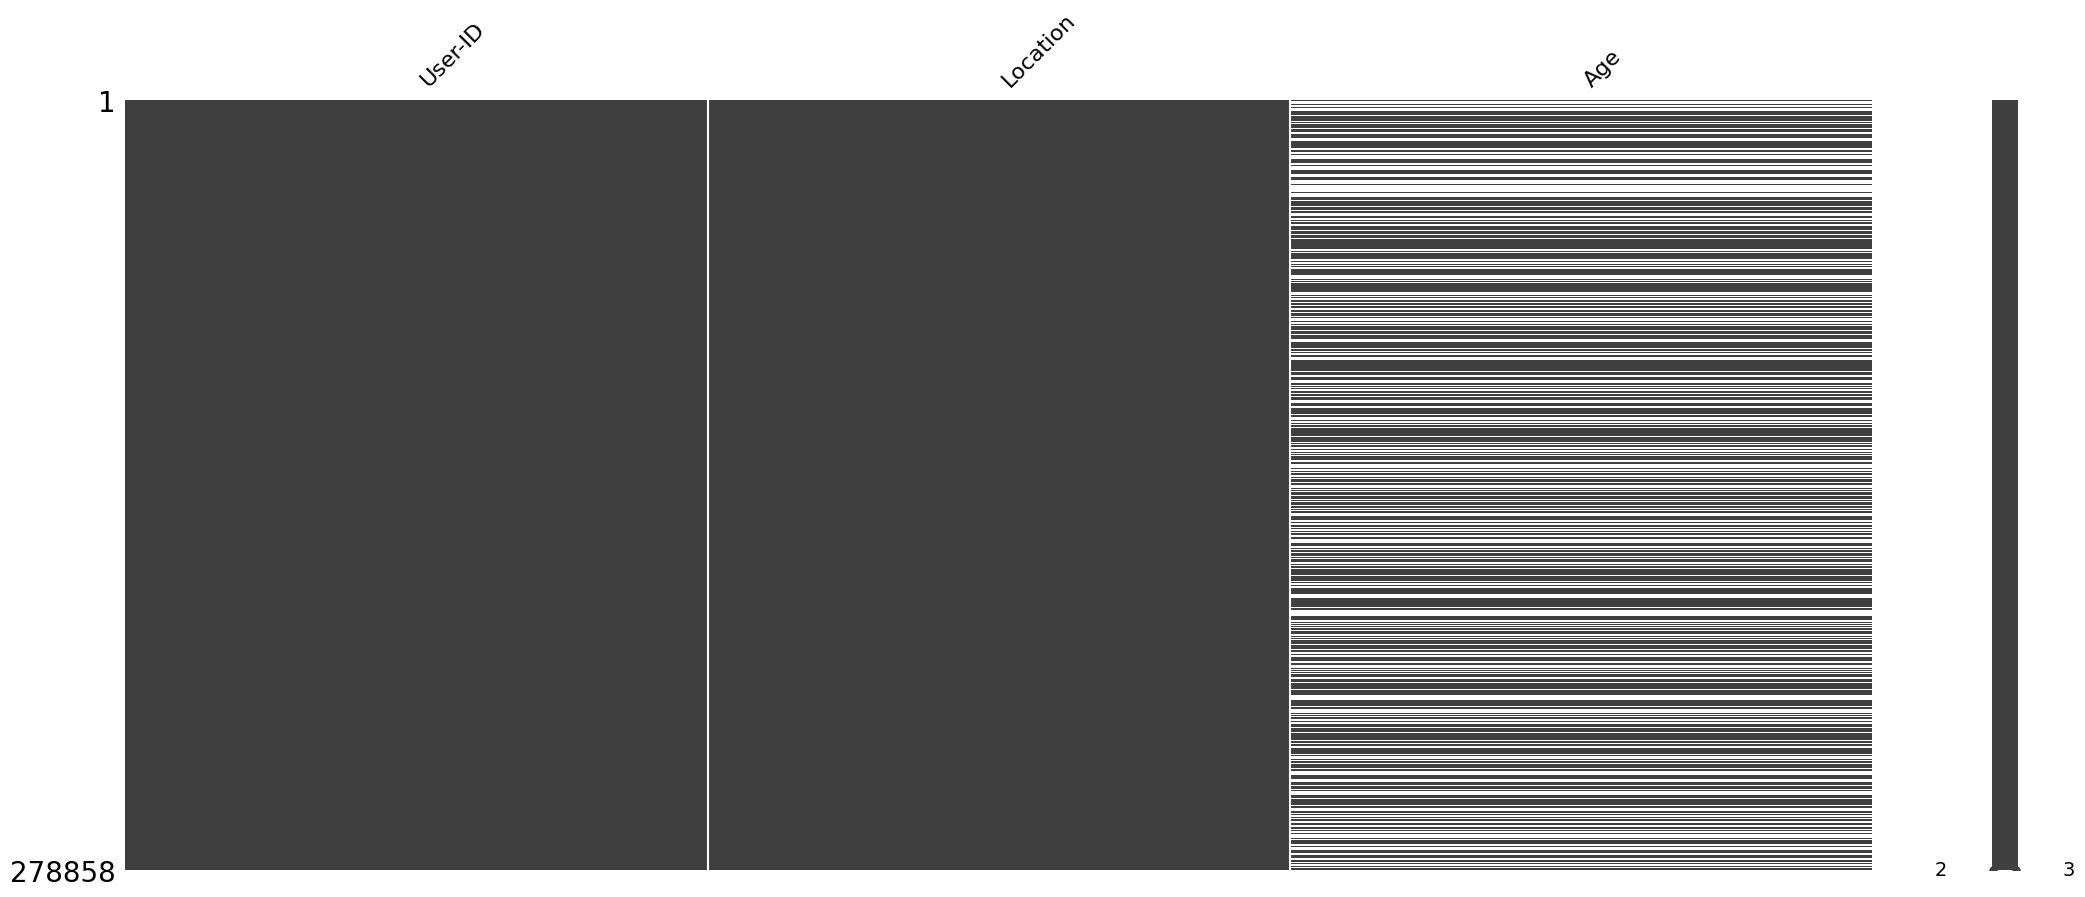

In [ ]:
# Visualizing the missing values
%matplotlib inline
print(msno.matrix(users_df))

#### What did you know about your dataset?

- We get to know that in all of our dataset no columns have much more null values except age column in User dataset. (Total missing values = 1,10,762).

## ***2. Understanding Your Variables***

### Dataset Columns

In [ ]:
# Dataset Columns.
print(f"Books dataset:-- {books_df.columns}")
print("\n==============================================================================\n")
print(f"Ratings dataset:-- {ratings_df.columns}")
print("\n===============================================================================\n")
print(f"Users dataset:-- {users_df.columns}")


Books dataset:-- Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


Ratings dataset:-- Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


Users dataset:-- Index(['User-ID', 'Location', 'Age'], dtype='object')


### Describe

In [ ]:
 # Dataset Describe
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
# Dataset Describe
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
# Dataset Describe
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Variables Description 

#### Books

- **ISBN -**  International Standard Book Number .
- **Book-Title -**  Title of the book . 
- **Book-Author -** Author of the book .
- **Year-Of-Publication -**  Which year books was published .
- **Publisher -**  Who is the Pulisher .
- **Image-URL-S -** URl linking to the cover image, flavour-Small .
- **Image-URL-M -** URl linking to the cover image, flavour-Medium .
- **Image-URL-L -** URl linking to the cover image, flavour-Large .

#### Ratings

- **User-ID -** Identity documentation of the user .
- **ISBN -** International Standard Book Number .
- **Book-Rating -** The rating of the book given by the users .


#### Users

- **User-ID -** Identity documentation of the user .
- **Location -** Location of the user .
- **Age -** Age of the user .


### Check Unique Values for each variable.

#### Books

In [ ]:
# Check Unique Values for each variable.
for i in books_df:
  print(f"Total Count of Unique values of {i} column - {books_df[i].nunique()}\n")
  print(f"Total Unique Values of {i} column - {books_df[i].unique()}\n")
  print("===================================================================================================\n") 

Total Count of Unique values of ISBN column - 271360

Total Unique Values of ISBN column - ['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752']


Total Count of Unique values of Book-Title column - 242135

Total Unique Values of Book-Title column - ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]


Total Count of Unique values of Book-Author column - 102023

Total Unique Values of Book-Author column - ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']


Total Count of Unique values of Year-Of-Publication column - 202

Total Unique Values of Year-Of-Publication column - [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 198

#### Ratings

In [ ]:
# Check Unique Values for each variable.
for i in ratings_df:
  print(f"Total Count of Unique values of {i} column - {ratings_df[i].nunique()}\n")
  print(f"Total Unique Values of {i} column - {ratings_df[i].unique()}\n")
  print("===================================================================================================\n") 

Total Count of Unique values of User-ID column - 105283

Total Unique Values of User-ID column - [276725 276726 276727 ... 276709 276721 276723]


Total Count of Unique values of ISBN column - 340556

Total Unique Values of ISBN column - ['034545104X' '0155061224' '0446520802' ... '0679752714' '0806917695'
 '05162443314']


Total Count of Unique values of Book-Rating column - 11

Total Unique Values of Book-Rating column - [ 0  5  3  6  8  7 10  9  4  1  2]




#### Users

In [ ]:
# Check Unique Values for each variable.
for i in users_df:
  print(f"Total Count of Unique values of {i} column - {users_df[i].nunique()}\n")
  print(f"Total Unique Values of {i} column - {users_df[i].unique()}\n")
  print("===================================================================================================\n") 

Total Count of Unique values of User-ID column - 278858

Total Unique Values of User-ID column - [     1      2      3 ... 278856 278857 278858]


Total Count of Unique values of Location column - 57339

Total Unique Values of Location column - ['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']


Total Count of Unique values of Age column - 165

Total Unique Values of Age column - [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
book_ratings = pd.merge(left=books_df, right=ratings_df, how='left', left_on='ISBN', right_on='ISBN')
book_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating'],
      dtype='object')

In [ ]:
book_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


In [ ]:
book_ratings.shape

(1032345, 10)

In [ ]:
book_ratings.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               1
Year-Of-Publication       0
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               4
User-ID                1209
Book-Rating            1209
dtype: int64

In [ ]:
#Popular 20 Books
print("################# Book Title #################  ################# Ratings ######################")
book_ratings.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:20]

################# Book Title #################  ################# Ratings ######################


Book-Title
Wild Animus                                                         2502
The Lovely Bones: A Novel                                           1295
The Da Vinci Code                                                    898
A Painted House                                                      838
The Nanny Diaries: A Novel                                           828
Bridget Jones's Diary                                                815
The Secret Life of Bees                                              774
Divine Secrets of the Ya-Ya Sisterhood: A Novel                      740
The Red Tent (Bestselling Backlist)                                  723
Angels &amp; Demons                                                  670
Life of Pi                                                           664
Snow Falling on Cedars                                               662
The Summons                                                          655
The Notebook                            

In [ ]:
#Popular 20 Book Authors/Writer
print("################# Book Title #################  ################# Ratings ######################")
book_ratings.groupby('Book-Author')['Book-Rating'].count().sort_values(ascending=False)[:20]

################# Book Title #################  ################# Ratings ######################


Book-Author
Stephen King                 10053
Nora Roberts                  8429
John Grisham                  6010
James Patterson               5845
Mary Higgins Clark            4777
Dean R. Koontz                4313
Tom Clancy                    4036
Danielle Steel                3726
Sue Grafton                   3457
Janet Evanovich               3350
Anne Rice                     3030
Michael Crichton              2921
J. K. Rowling                 2908
JOHN GRISHAM                  2808
V.C. Andrews                  2785
Sandra Brown                  2663
Nicholas Sparks               2650
R. L. Stine                   2606
Rich Shapero                  2502
Patricia Daniels Cornwell     2461
Name: Book-Rating, dtype: int64

In [ ]:
#Popular 20 Publishers
print("################# Book Title #################  ################# Ratings ######################")
book_ratings.groupby('Publisher')['Book-Rating'].count().sort_values(ascending=False)[:20]

################# Book Title #################  ################# Ratings ######################


Publisher
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Jove Books                  15178
Silhouette                  14184
Dell                        13916
Scholastic                  13662
Perennial                   13466
Fawcett Books               12905
Dell Publishing Company     12733
HarperTorch                 12081
Vintage Books USA           11426
Simon &amp; Schuster        10318
Name: Book-Rating, dtype: int64

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: title={'center': 'Shift Plot'}, xlabel='Year-Of-Publication', ylabel='Counts Difference'>

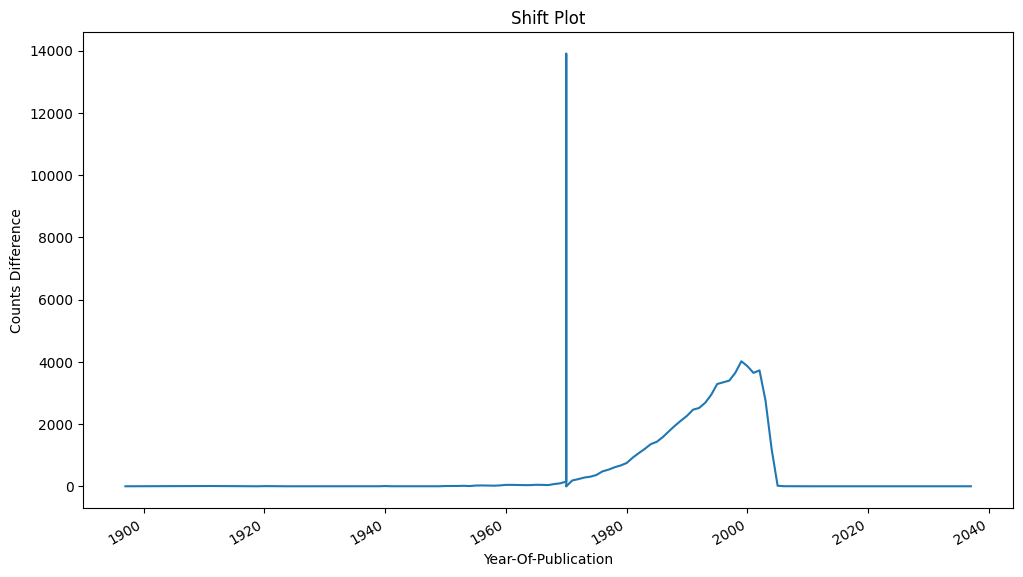

In [ ]:
# Chart - 1 visualization code
# Creating dataframe by using value count function on year column.
df = books_df['Year-Of-Publication'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Converted the object to datetime format.
df['unique_values'] = pd.to_datetime(df['unique_values'],errors='coerce')

# Setting the index.
dataframe = df.set_index('unique_values')
dataframe

# plotting line graph.
dataframe['Change'] = dataframe.counts
dataframe['Change'].plot(figsize=(12, 7),
                         xlabel = "Year-Of-Publication",
                         ylabel = "Counts Difference",
                         title = "Shift Plot")


##### **Insights from the above graph :**

**WHY WE USED THIS CHART?**
- We used the line chart because it was giving better visualisation.

**What is/are the insight(s) found from the chart?**
- Around the year 1970 most max. number of the books are being published by the authors.
- After the year 2005 books are being published near to the none.
- we have some wrong data as well because there are some books are being published even before the year has come i.e., (2023-2040). 


#### Chart - 2

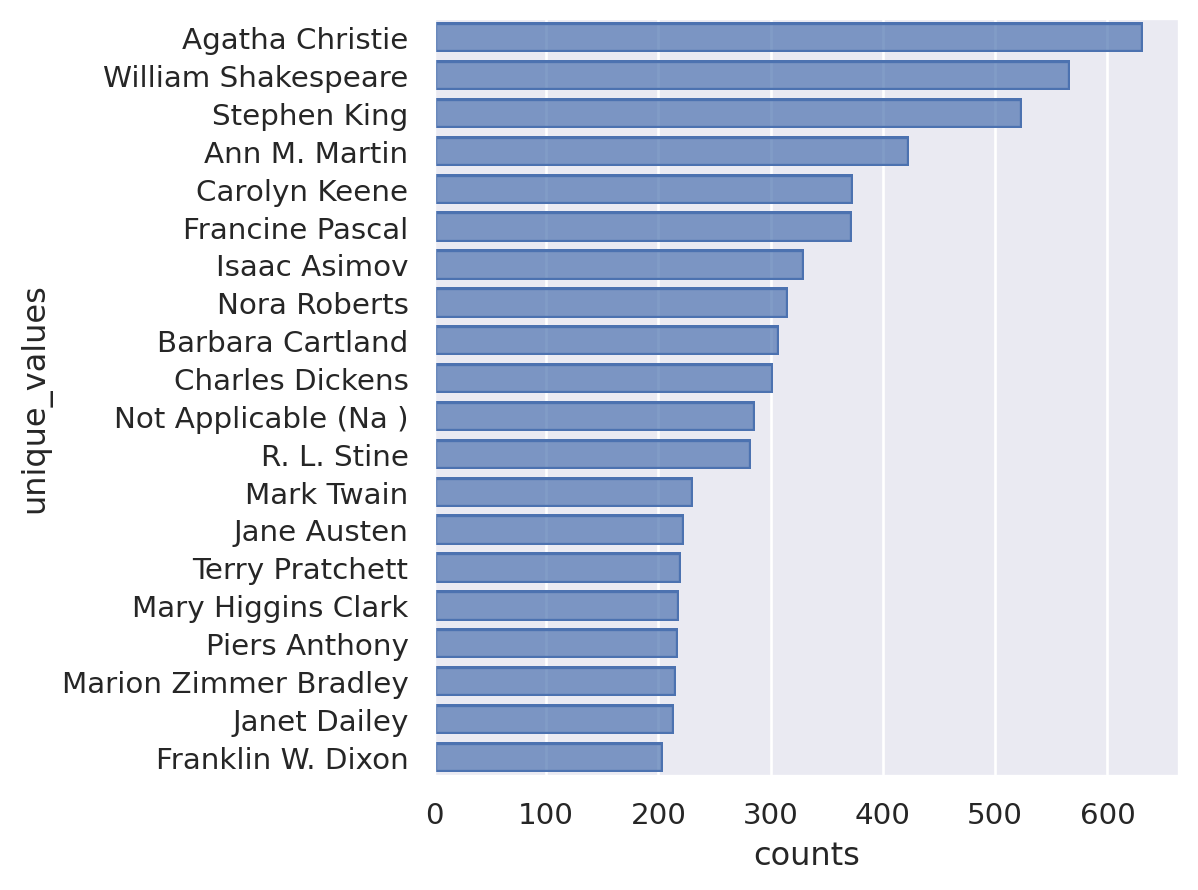

In [ ]:
# Chart - 2 visualization code

df_Author = books_df['Book-Author'].value_counts().rename_axis('unique_values').reset_index(name='counts')

df_Author.drop(df_Author[df_Author['counts'] <=200].index,inplace = True) 

so.Plot( df_Author['counts'],df_Author['unique_values']).add(so.Bar())

##### **Insights from the above graph :**

**WHY WE USED THIS CHART?**
- . We used this bar chart to understand those writers who have pulished more than 200 books.

**What is/are the insight(s) found from the chart?**
- We found that Agatha Christie has written maximum number of books.

#### Chart - 3

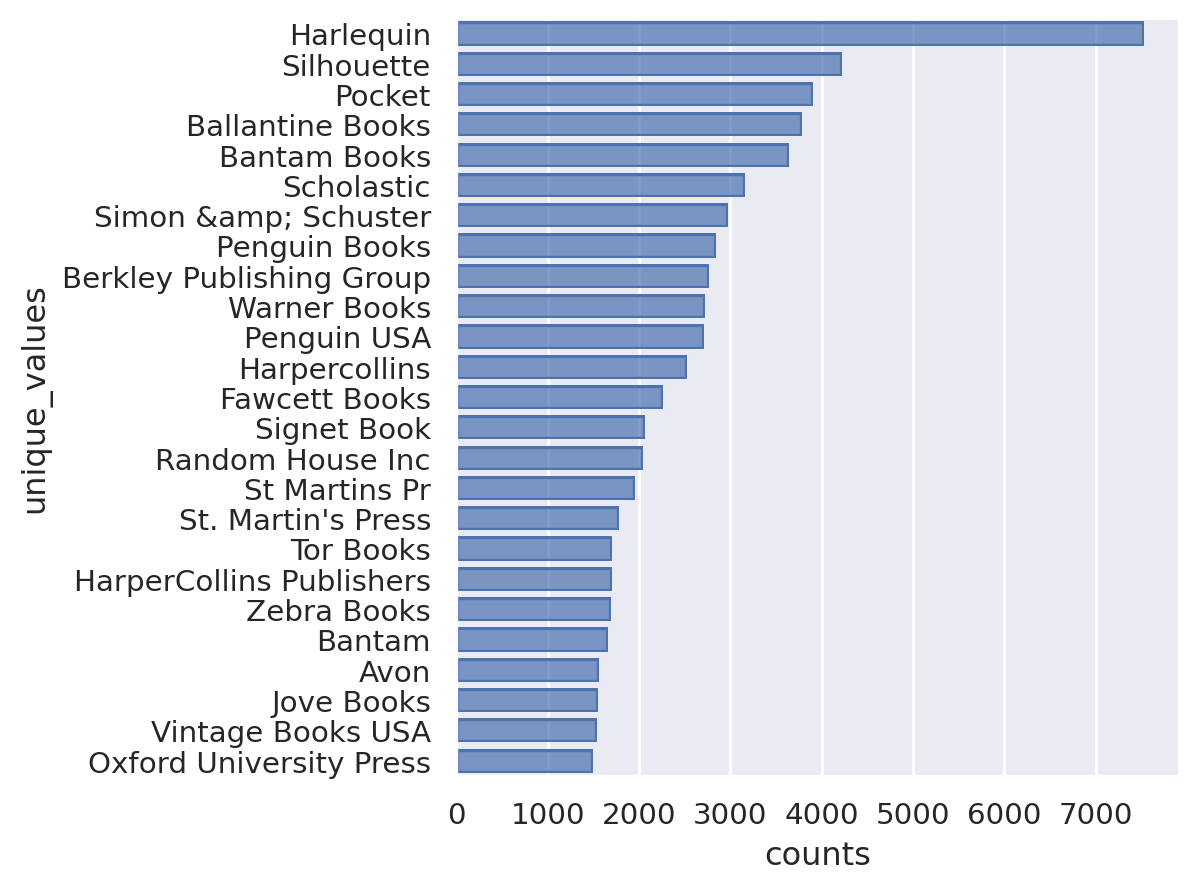

In [ ]:
# Chart - 3 visualization code
df_publisher = books_df['Publisher'].value_counts().rename_axis('unique_values').reset_index(name='counts')

df_publisher.drop(df_publisher[df_publisher['counts'] <= 1500].index,inplace = True) 

so.Plot(df_publisher['counts'],df_publisher['unique_values']).add(so.Bar())

##### **Insights from the above graph :**

**WHY WE USED THIS CHART?**
- . We used this bar chart to understand those publisher who have pulished more than 1500 books.

**What is/are the insight(s) found from the chart?**
- We found that Harlequin has published maximum number of books.

#### Chart - 4

Text(0.5, 1.02, 'Ratings')

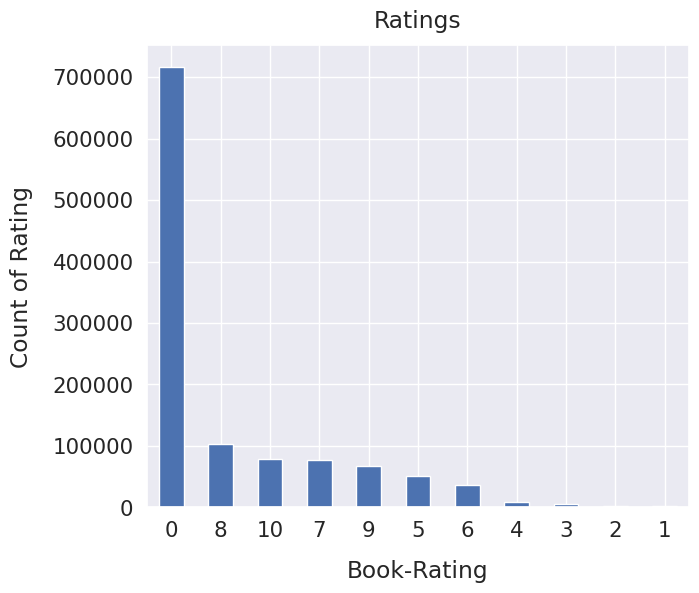

In [ ]:
# Chart - 4 visualization code
sns.set(font_scale=1.4)
ratings_df['Book-Rating'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Book-Rating", labelpad=14)
plt.ylabel("Count of Rating", labelpad=14)
plt.title("Ratings", y=1.02)

##### **Insights from the above graph :**

**WHY WE USED THIS CHART?**
-  We used this bar chart to understand ratings from the different users.

**What is/are the insight(s) found from the chart?**
- We found that 8 star rating is most most fequent rating done by the maximum number of users..

#### Chart - 5

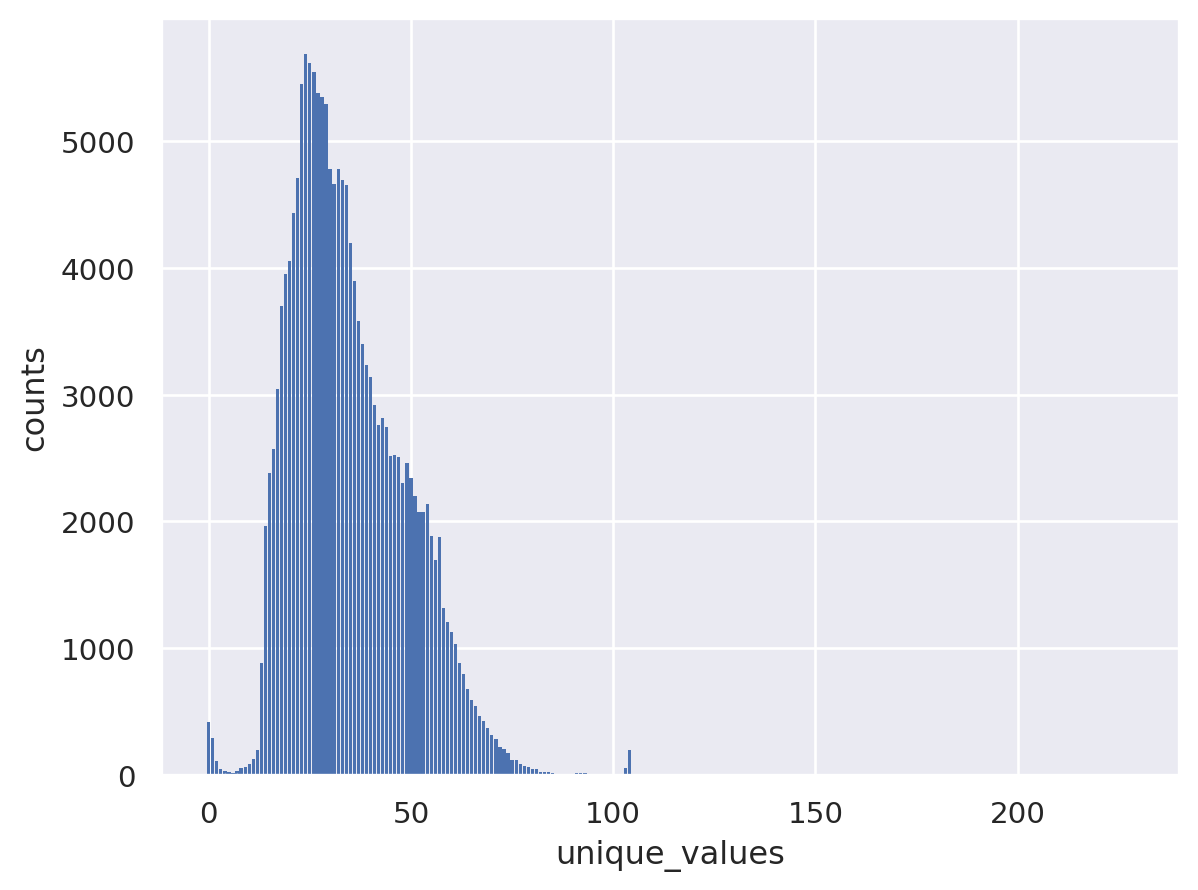

In [ ]:
# Chart - 5 visualization code
df_users = users_df['Age'].value_counts().rename_axis('unique_values').reset_index(name='counts')

df_users.drop(df_users[df_users['counts'] <=1].index,inplace = True) 

so.Plot(df_users['unique_values'],df_users['counts']).add(so.Bar())

##### **Insights from the above graph :**

**WHY WE USED THIS CHART?**
-  We used this bar chart to understand age differences of the users.

**What is/are the insight(s) found from the chart?**
- We found that maxiumum number of people are in the age group of 25-30.
- It has many missing values and outliers as well , outliers are in the age group of 100 and above. Total number of outliers are around 350-500.

#### Chart - 6

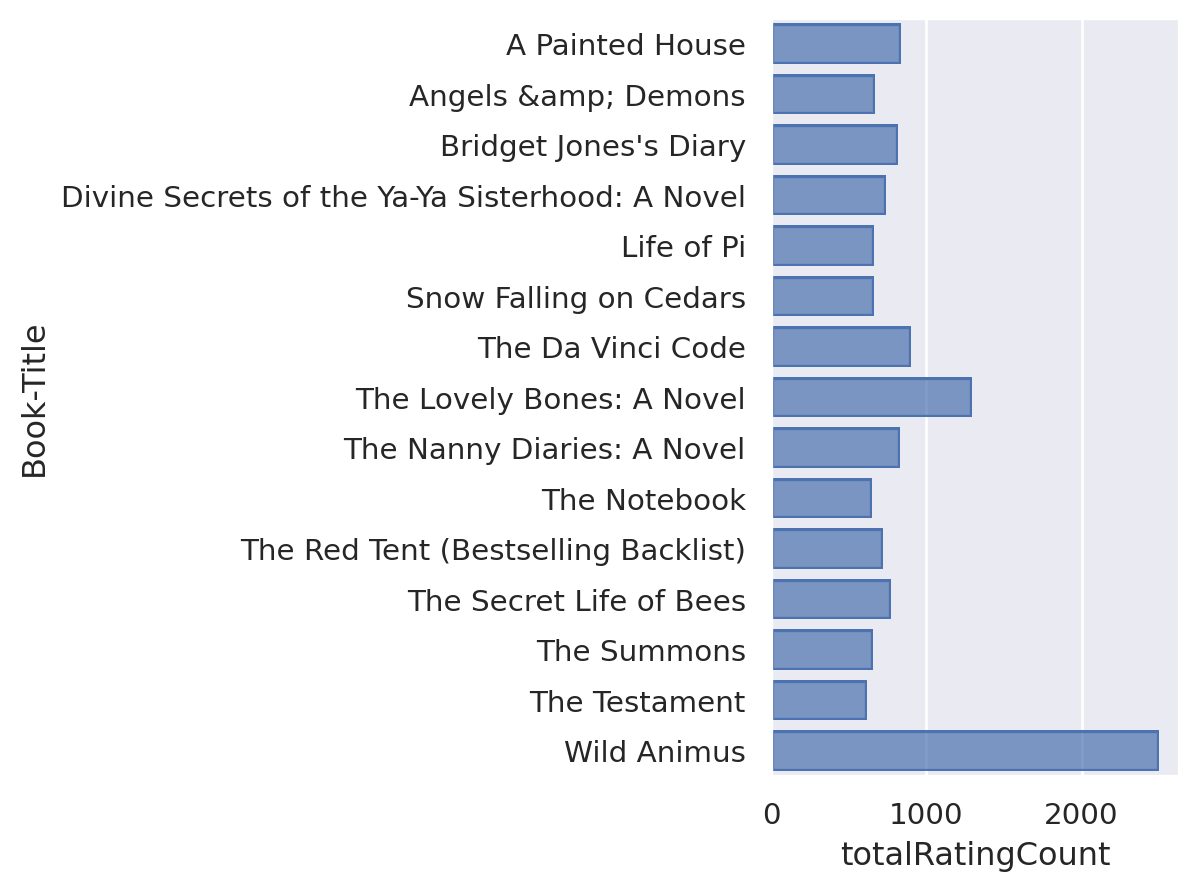

In [ ]:
# Chart - 6 visualization code
combine_book = pd.merge(books_df,ratings_df, on="ISBN")

book_ratingCount = (combine_book.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating' : 'totalRatingCount'})[['Book-Title', 'totalRatingCount']])

book_ratingCount.drop(book_ratingCount[book_ratingCount['totalRatingCount'] < 600].index,inplace = True) 

so.Plot(book_ratingCount['totalRatingCount'],book_ratingCount['Book-Title']).add(so.Bar())

##### **Insights from the above graph :**

**WHY WE USED THIS CHART?**
-  We used this bar chart to understand total number of user's count who have done rating.

**What is/are the insight(s) found from the chart?**
- We have short listed only those books who have gotten more than 600 user's rating.
- We found that "WILD ANIMUS BOOK" has been rated by more than 2000 users.


## ***5. Feature Engineering & Data Pre-processing***

### 1. Feature Manipulation & Selection

In [ ]:
# Lets store users who had at least rated more than 200 books
x = ratings_df['User-ID'].value_counts() > 200

In [ ]:
# Index
y= x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [ ]:
# We are looking for the user_id in the index of Y
ratings_df = ratings_df[ratings_df['User-ID'].isin(y)]

In [ ]:
# ratings_head
ratings_df.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [ ]:
# Here joining ratings_df with books_df
ratings_with_books = ratings_df.merge(books_df, on='ISBN')

In [ ]:
ratings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [ ]:
# shape of the ratings with books
ratings_with_books.shape

(487671, 10)

In [ ]:
# Here we are Grouping among book_title and book_rating .
number_rating = ratings_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [ ]:
# Changing the column name of book_reading to number_of_books
number_rating.rename(columns={'Book-Rating':'num_of_rating'},inplace=True)

In [ ]:
number_rating.head()

,Book-Title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
# Final ratings
final_rating = ratings_with_books.merge(number_rating, on='Book-Title')

In [ ]:
final_rating.shape

(487671, 11)

In [ ]:
# We are looking for those books which have more than 50 rating.
final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [ ]:
# lets drop the duplicates
final_rating.drop_duplicates(['User-ID','Book-Title'],inplace=True)

<ipython-input-50-d3d67db4aa45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rating.drop_duplicates(['User-ID','Book-Title'],inplace=True)


In [ ]:
final_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82


In [ ]:
final_rating.shape

(59850, 11)

#### 2. Feature Selection

In [ ]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(columns='User-ID', index='Book-Title', values= 'Book-Rating')
book_pivot.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN


### 2. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
book_pivot.fillna(0, inplace=True)

In [ ]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#keeping books name
book_names = book_pivot.index

#### What all missing value imputation techniques have you used and why did you use those techniques?

- We have used the fillna() method to fill all the null value with 0 (zero).

### 3. sparse matrix

In [ ]:
# Sparse your data
from scipy.sparse import csr_matrix

In [ ]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

##### Which method have you used to scale you data and why?

- We have Sparse matrix to scale the features.

## ***6. ML Model Implementation***

### ML Model -1 (NearestNeighbors)

In [ ]:
# ML Model - 1 Implementation
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')

# Fit the Algorithm
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
# Predict on the model
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1))
suggestions

array([[237, 240, 238, 241, 184]])

In [ ]:
#let us print all the suggested books.
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive'],
      dtype='object', name='Book-Title')


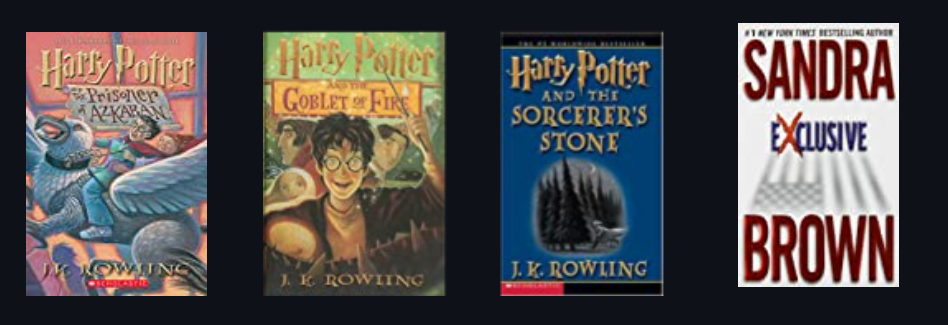

In [ ]:
book_pivot.index[237]


'Harry Potter and the Chamber of Secrets (Book 2)'

### ML Model - 2 (KMeans)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Load the dataset
df = final_rating
# Drop any rows with missing data
df.dropna(inplace=True)
# Separate the book titles into a separate series
titles = df["Book-Title"]

In [ ]:
# Feature Extraction
# Use the TfidfVectorizer class to transform the book titles into a matrix of numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(titles)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


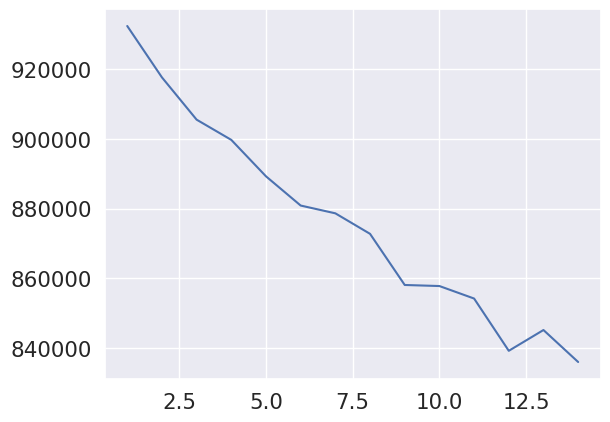

In [ ]:
# Finding value of K
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(book_sparse)
    wcss.append(km.inertia_)
  
plt.plot(range(1,15),wcss)

In [ ]:
# ML Model - 3 Implementation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

# Fit the Algorithm
kmeans.fit(X)

KMeans(n_clusters=10)

In [ ]:
#Recommend Similar Books
# Given a book title, find the cluster it belongs to and recommend other books in that cluster
new_title = "Harry Potter and the Chamber of Secrets"

new_X = vectorizer.transform([new_title])
cluster = kmeans.predict(new_X)[0]
cluster_books = df[kmeans.labels_ == cluster]["Book-Title"]
cluster_books.drop_duplicates(inplace=True)
df = pd.DataFrame(cluster_books)
df.head(5)

<ipython-input-67-317421270660>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_books.drop_duplicates(inplace=True)


,Book-Title
0,Politically Correct Bedtime Stories: Modern Ta...
1090,The Secret Life of Bees
4155,"Tuesdays with Morrie: An Old Man, a Young Man,..."
4394,Oryx and Crake
5367,Rules of Prey


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- We have selected NearestNeighbors model as our final prediction model.
- Because NearestNeighbors model was suggesting more similar books than K-means model.

### 3. Explain the model which you have used ?

- We have used the NearestNeighbors model which is works on the "Content-Based Recommendation sytem".  

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
pickle.dump(model,open('/content/model_saved','wb'))
pickle.dump(book_names,open('/content/model_saved','wb'))
pickle.dump(final_rating,open('/content/model_saved','wb'))
pickle.dump(book_pivot,open('/content/model_saved','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

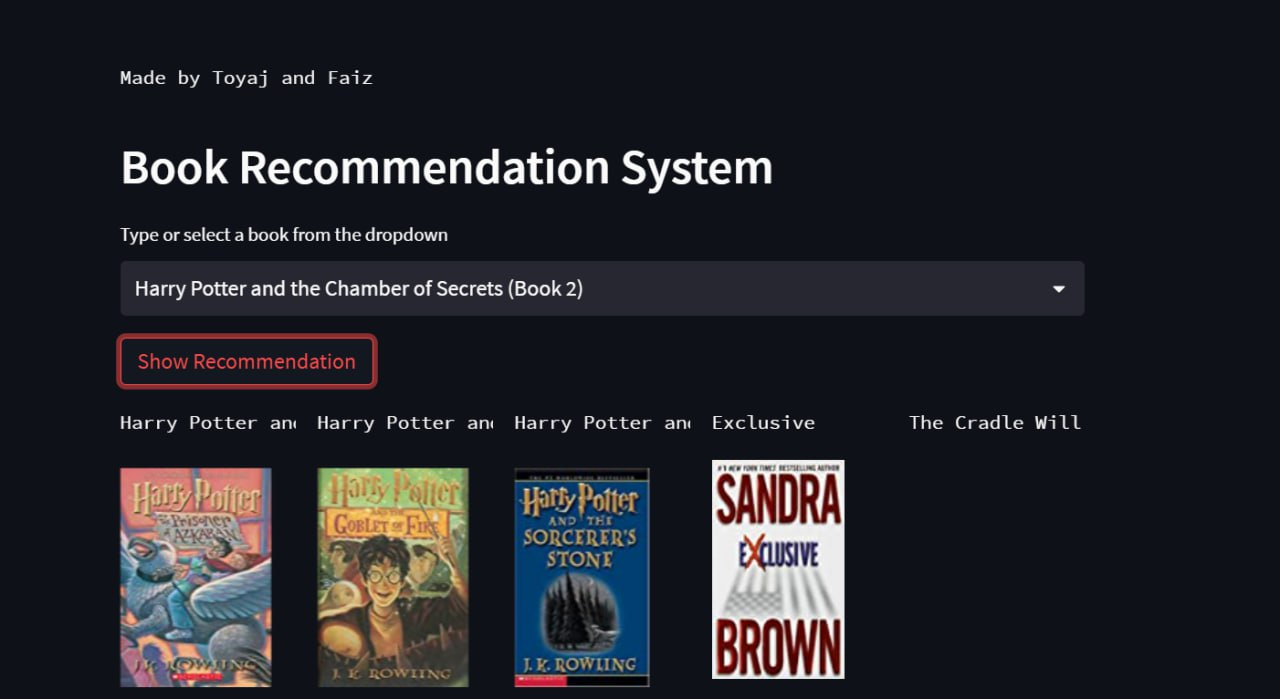

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

- In conclusion, a book recommender system can be a valuable tool for both book enthusiasts and businesses in the book industry. By analyzing user preferences and behavior, a recommender system can provide personalized book recommendations that improve the user's overall reading experience and increase their engagement with the platform.

- Businesses can also benefit from a book recommender system by increasing customer satisfaction, retention, and revenue. With a personalized book recommendation system, businesses can create a competitive advantage by offering tailored book recommendations that are more likely to result in book purchases.

- However, creating effective book recommender system was the challenge, requiring a comprehensive understanding of machine learning algorithms, data analysis, and user behavior.

- Overall, a book recommender system can be a powerful tool for both book enthusiasts and businesses in the book industry, but it requires careful consideration and implementation to be successful.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***